Для удобства я облачил процесс обучения и тестирования в функции

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [12]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return (x)*(1 - (x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [13]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
#x = normalize(x.as_matrix())
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
#y = y.as_matrix()
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [4]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [29]:
### Шаг 3. Обученние нейронной сети
def neuro_net_train(neuron_numb, era, nu, X_train_loc= None, y_train_loc=None):
    # определим число нейронов скрытого слоя
    #neuron_numb = 35


    # присваевание случайных весов



    w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
    w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

    # массив для ошибок, чтобы потом построить график
    errors = []

    # процесс обучения
    for i in range(era):

        # прямое распространение(feed forward)
        layer0 = X_train_loc
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train_loc - layer2 # производная функции потерь = производная квадратичных потерь 
        layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)
        # коррекция
        w1 += layer1.T.dot(layer2_delta) * nu
        w0 += layer0.T.dot(layer1_delta) * nu
        # метрика модели
        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100
    return [accuracy, errors, layer2], [w0, w1]
    
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
def represent_train(errors):
    plt.figure(figsize = (16,5))
    plt.plot(errors)
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')
    plt.show() # расскоментируйте, чтобы посмотреть 

def represent_res(layer, y_train):
    N = 50
    plt.figure(figsize = (16,5))
    plt.plot(layer[:N,1], 'r',label = 'Y new')
    plt.plot(y_train[:N,1],'g', label = 'Y train')
    plt.xlabel('№ примера')
    plt.ylabel('выход сети и целевой')
    plt.legend( )
    plt.show() # расскоментируйте, чтобы посмотреть '''
    
def accuracy(accuracy):     
    print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

тестовая проверка работы функции обучения

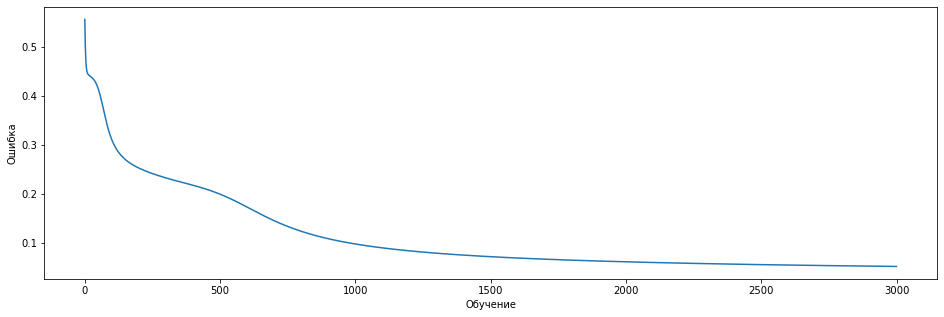

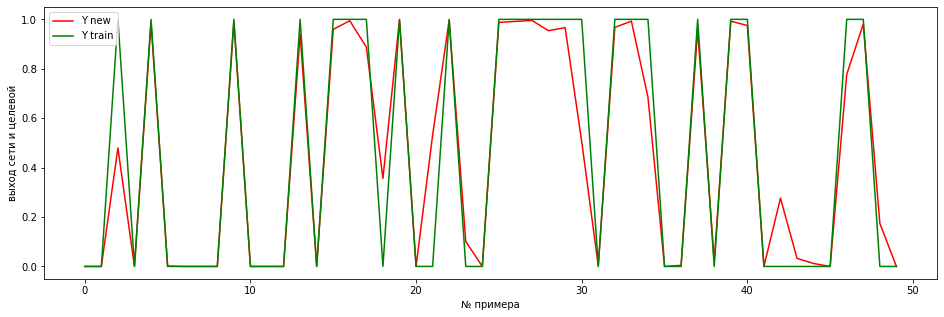

Аккуратность нейронной сети 94.84%


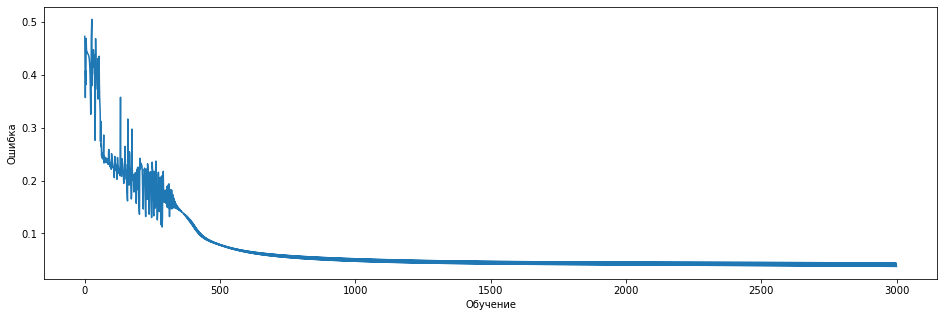

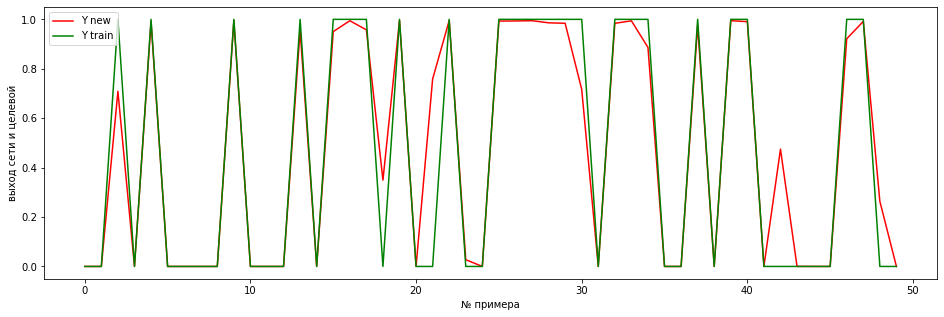

Аккуратность нейронной сети 96.25%


In [137]:
results, params = neuro_net_train(5, 3000, 0.05, X_train, y_train)
represent_train(results[1])
represent_res(results[2], y_train)
accuracy(results[0])

results3, params3 = neuro_net_train3(5, 5, 3000, 0.5, X_train, y_train)
represent_train(results3[1])
represent_res(results3[2], y_train)
accuracy(results3[0])

тестовая проверки работы функции запуска сети

In [138]:
def neuro_net_run(params, X_test_loc, y_test_loc):
    # прямое распространение(feed forward)
    layer0_t = X_test_loc
    layer1_t = sigmoid(np.dot(layer0_t, params[0]))
    layer2_t = sigmoid(np.dot(layer1_t, params[1]))
    layer2_error_t = y_test_loc - layer2_t
    error_t = np.mean(np.abs(layer2_error_t))
    accuracy_t = (1 - error_t) * 100
    return [accuracy_t, layer2_t]

def neuro_net_run3(params, X_test_loc, y_test_loc):
    # прямое распространение(feed forward)
    layer0_t = X_test_loc
    layer1_t = sigmoid(np.dot(layer0_t, params[0]))
    layer2_t = sigmoid(np.dot(layer1_t, params[1]))
    layer3_t = sigmoid(np.dot(layer2_t, params[2]))
    layer3_error_t = y_test_loc - layer3_t
    error_t = np.mean(np.abs(layer3_error_t))
    accuracy_t = (1 - error_t) * 100
    return [accuracy_t, layer3_t]

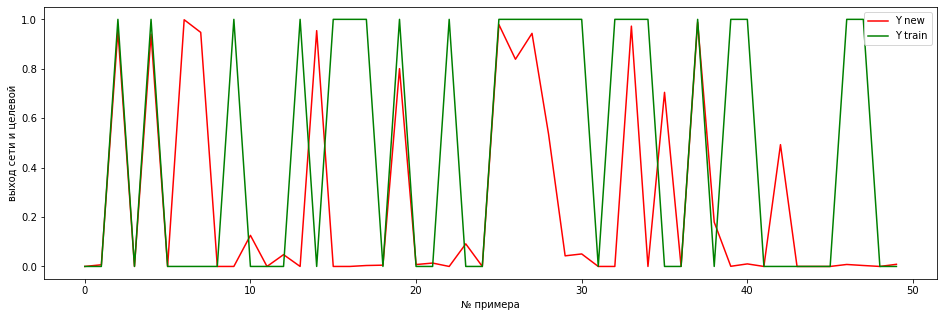

Аккуратность нейронной сети 95.55%


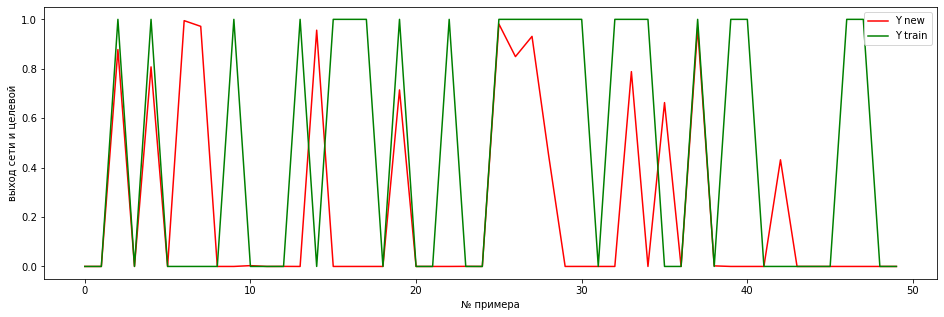

Аккуратность нейронной сети 95.65%


In [139]:
res = neuro_net_run(params,X_test, y_test)

represent_res(res[1], y_train)
accuracy(res[0])

res3 = neuro_net_run3(params3,X_test, y_test)

represent_res(res3[1], y_train)
accuracy(res3[0])

запуск цикла для записи всех значений в датафрейм

In [94]:
Error_table = pd.DataFrame(columns =['neurons number', 'learning rate', 'epoch', 'mean acc.(train)', 'mean acc.(test)'] )
ind = 0
for neurons in [1, 3, 5, 7, 10, 15, 30, 50, 100, 200]:
    for learn_rate in [0.0001, 0.005, 0.05, 0.5]:
        acc_mas = []
        acc_mas_t = []
        for era in [1000, 2000, 5000]:
            for j in range(10):
                results, params = neuro_net_train(neurons, era, learn_rate, X_train, y_train)
                acc_mas.append(results[0])
                res = neuro_net_run(params,X_test, y_test)
                acc_mas_t.append(res[0])
            Error_table.loc[ind, ['neurons number', 'learning rate', 'epoch', 'mean acc.(train)', 'mean acc.(test)']] \
                                        = [neurons, learn_rate, era, np.mean(acc_mas), np.mean(acc_mas_t)]
            ind += 1

In [142]:
Error_table3 = pd.DataFrame(columns =['neurons number1', 'neurons number2', 'learning rate', 
                                     'epoch', 'mean acc.(train)', 'mean acc.(test)'] )
ind = 0
for neurons1 in [1, 3, 5, 7, 10, 15,]:
    for neurons2 in [1, 3, 5, 7, 10, 15,]:
        for learn_rate in [0.0001, 0.005, 0.05, 0.5]:
            acc_mas3 = []
            acc_mas_t3 = []
            for era in [1000, 2000, 5000]:
                for j in range(10):
                    results3, params3 = neuro_net_train3(neurons1, neurons2, era, learn_rate, X_train, y_train)
                    acc_mas3.append(results3[0])
                    res3 = neuro_net_run3(params3,X_test, y_test)
                    acc_mas_t3.append(res3[0])
                    Error_table3.loc[ind, ['neurons number1', 'neurons number2', 'learning rate', 'epoch',
                                            'mean acc.(train)', 'mean acc.(test)']]\
                    = [neurons1, neurons2, learn_rate, era, np.mean(acc_mas3), np.mean(acc_mas_t3)]
                    ind += 1

In [96]:
Error_table

,neurons number,learning rate,epoch,mean acc.(train),mean acc.(test)
0,1,0.0001,1000,51.3035,51.2631
1,1,0.0001,2000,51.735,51.6865
2,1,0.0001,5000,52.1353,52.019
3,1,0.005,1000,55.7216,55.1727
4,1,0.005,2000,55.878,55.1019
...,...,...,...,...,...
115,200,0.05,2000,66.6666,66.6666
116,200,0.05,5000,66.6666,66.6666
117,200,0.5,1000,59.8667,56.9333
118,200,0.5,2000,58.0667,57.2


In [143]:
Error_table3

,neurons number1,neurons number2,learning rate,epoch,mean acc.(train),mean acc.(test)
0,1,1,0.0001,1000,50.0996,50.3347
1,1,1,0.0001,1000,49.9829,50.1361
2,1,1,0.0001,1000,49.7494,49.7542
3,1,1,0.0001,1000,49.8926,50.1045
4,1,1,0.0001,1000,50.3288,50.3858
...,...,...,...,...,...,...
4315,15,15,0.5,5000,92.7113,93.521
4316,15,15,0.5,5000,91.7467,92.5264
4317,15,15,0.5,5000,91.9072,92.65
4318,15,15,0.5,5000,92.0457,92.8177


In [117]:
Error_table.to_csv('Error_table.csv', sep = ';')

In [144]:
Error_table3.to_csv('Error_table3.csv', sep = ';')

Рассмотрим сначала двухслойную сеть

In [105]:
Error_table.sort_values(['mean acc.(test)'], ascending = False).head(30)

,neurons number,learning rate,epoch,mean acc.(train),mean acc.(test)
47,7,0.5,5000,95.9739,97.0386
71,15,0.5,5000,96.0565,97.0196
59,10,0.5,5000,95.9842,97.0022
35,5,0.5,5000,95.9934,96.939
23,3,0.5,5000,95.9204,96.9162
46,7,0.5,2000,95.6773,96.7511
58,10,0.5,2000,95.6939,96.7018
70,15,0.5,2000,95.7737,96.6908
34,5,0.5,2000,95.7289,96.5827
22,3,0.5,2000,95.66,96.552


Из таблицы выше выидно, что лучшие результаты получаются у сетей с 3 -15 нейронов при этом скорость обучения 0.5. Увеличение количества эпох не сильно повлияло на эффективность.

In [107]:
Error_table.sort_values(['mean acc.(test)']).head(30)

,neurons number,learning rate,epoch,mean acc.(train),mean acc.(test)
0,1,0.0001,1000,51.3035,51.2631
105,100,0.5,1000,49.2667,51.4667
1,1,0.0001,2000,51.735,51.6865
12,3,0.0001,1000,51.5906,51.9429
2,1,0.0001,5000,52.1353,52.019
24,5,0.0001,1000,52.9377,52.6221
13,3,0.0001,2000,52.7914,52.8478
25,5,0.0001,2000,53.6553,53.4098
36,7,0.0001,1000,53.8076,53.4982
14,3,0.0001,5000,53.6784,53.5763


Хуже всего ведут себя сети с очень маленьким количеством нейронов и с очень маленькой сокростью обучения. Так же плохо себя показывают сети с очень большим количеством нейронов.

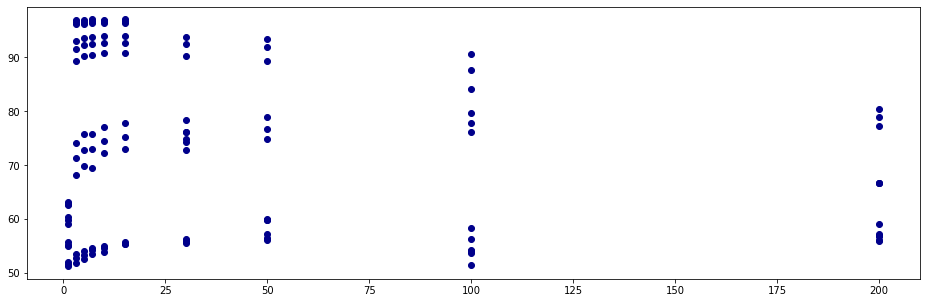

In [110]:
plt.figure(figsize = (16,5))
plt.scatter(x=Error_table['neurons number'],
                       y=Error_table['mean acc.(test)'],
                       c='DarkBlue')
plt.show()                                     

Выше сказанное можно понять и по графику. Лучшие показатели у сетей с нейронами от 3 - 20, но при этом в них и самый большой разброс

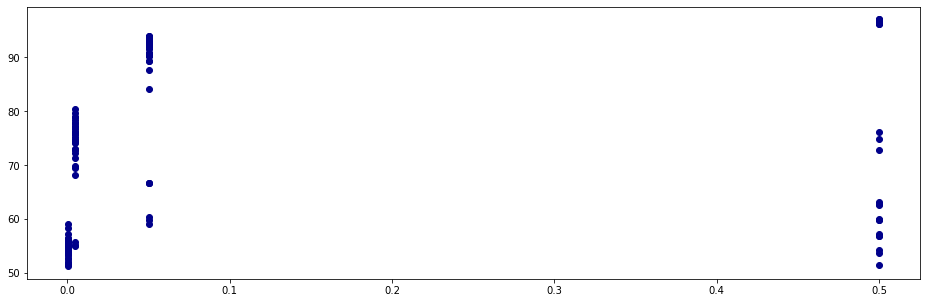

In [114]:
plt.figure(figsize = (16,5))
plt.scatter(x=Error_table['learning rate'],
                       y=Error_table['mean acc.(test)'],
                       c='DarkBlue')
plt.show()  

Так же можно сказать, что самые лучшие показатели у скорости обучения 0.5, чуть хуже у 0.05,
остальные скорости обучения проигрывают этим двум. Однако, у скорости 0.5 очень много низких значений, 
это, как было видно из таблицы, вызвано либо большим/слишком малым количеством нейронов

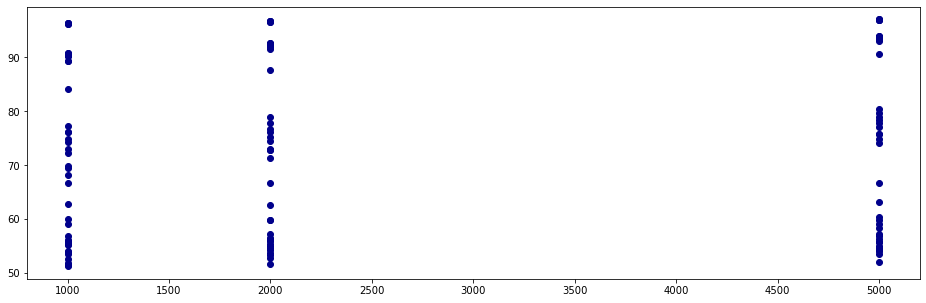

In [115]:
plt.figure(figsize = (16,5))
plt.scatter(x=Error_table['epoch'],
                       y=Error_table['mean acc.(test)'],
                       c='DarkBlue')
plt.show() 

При этом можно сказать, что количество эпох не влияет определяющим образом на качество обучения модели, хотя из данных можно заметить, что при большом количестве эпох сети с большим количеством нейронов начинают вести себя лучше

Можно сделать выводы, что ключевыми параметрами являются количество нейронов и скорость обучения, при этом их нужно подбирать в совокупности. Слишком большое или малое количество нейронов может негативно сказаться на эффективности, при этом слишком малая скорость обучения, так же может принести вред

Рассмотрим теперь трехслойную сеть

In [147]:
display(Error_table3.sort_values(['mean acc.(test)'], ascending = False).head(30))
display(Error_table3.sort_values(['mean acc.(test)']).head(30))

,neurons number1,neurons number2,learning rate,epoch,mean acc.(train),mean acc.(test)
3359,10,7,0.5,5000,95.9012,96.8843
2039,5,10,0.5,5000,95.9194,96.8812
3358,10,7,0.5,5000,95.9085,96.8306
2038,5,10,0.5,5000,95.892,96.8301
2037,5,10,0.5,5000,95.8827,96.8039
3357,10,7,0.5,5000,95.8798,96.7903
3356,10,7,0.5,5000,95.8342,96.7741
3355,10,7,0.5,5000,95.8074,96.7712
2519,7,5,0.5,5000,95.8856,96.7623
2518,7,5,0.5,5000,95.8578,96.7586


,neurons number1,neurons number2,learning rate,epoch,mean acc.(train),mean acc.(test)
1080,3,7,0.0001,1000,50.2298,49.5982
2,1,1,0.0001,1000,49.7494,49.7542
720,3,1,0.0001,1000,49.9897,49.8228
2162,7,1,0.0001,1000,50.1231,49.8524
2163,7,1,0.0001,1000,50.4368,49.8787
3,1,1,0.0001,1000,49.8926,50.1045
1449,5,1,0.0001,1000,50.1447,50.124
1,1,1,0.0001,1000,49.9829,50.1361
2161,7,1,0.0001,1000,50.3902,50.1523
1448,5,1,0.0001,1000,50.1682,50.1754


Из таблицы видно, что данная сеть по эффективности близка к двухслойной, даже немного похуже. При этом лучшие результаты достигаются, когда в слоях 5-10 нейрнов. При этом наибольшая эффективность достигается при большом количестве эпох и быстрой скорости обучения.